In [1]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from scipy.sparse import spdiags,linalg,eye

In [2]:
def init_state(grid_size=10):
    """
    This Function intalizes the state for random configuration
    """
    spins = np.random.choice([-1, 1], size=(grid_size, grid_size))  # random initial configuration of spins
    return spins

In [3]:
def calcEnergy(config, grid_size):
    '''
    Energy of a given configuration
    '''
    energy = 0

    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i, j]
            nb = config[(i + 1) % grid_size, j] + config[i, (j + 1) % grid_size] + config[(i - 1) % grid_size, j] + \
                 config[i, (j - 1) % grid_size]
            energy += -nb * S
    return energy / 2.  # to compensate for over-counting

In [4]:
def calc_magnetization(spins):
    """
    Calculates the Magnetization of given configuration
    """
    return np.sum(spins)

In [5]:
def perform_simulation(spins, beta):
    """
    Run the Simulation
    """
    # Run the Metropolis-Hastings algorithm
    for i in range(grid_size):
        for j in range(grid_size):
            # Choose a random spin
            a = np.random.randint(0, grid_size)
            b = np.random.randint(0, grid_size)
            # Get the spins based on generated random numbers
            s = spins[a, b]
            # Compute the Energy 
            nb = spins[(a + 1) % grid_size, b] + spins[a, (b + 1) % grid_size] + spins[(a - 1) % grid_size, b] + spins[
                a, (b - 1) % grid_size]
            cost = 2 * s * nb
            if cost < 0:
                s *= -1
            elif rand() < np.exp(-cost * beta):
                s *= -1
            spins[a, b] = s
    return spins

In [6]:
n_steps=1000
temperature=1
grid_size=10
init_config_state=init_state(grid_size=grid_size)

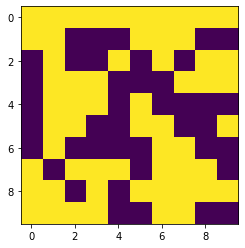

In [7]:
plt.imshow(init_config_state)
plt.savefig('initial.png')
plt.show()

In [8]:
num_temp = 10 # Number of Temperature Points
grid_size_val=10 # Size of the Lattice
eqSteps = 2**8       
mcSteps = 2**9       
T       = np.linspace(1.00, 3.5, num_temp) 
E,M,C,X = np.zeros(num_temp), np.zeros(num_temp), np.zeros(num_temp), np.zeros(num_temp)
n1, n2  = 1.0/(mcSteps*grid_size*grid_size), 1.0/(mcSteps*mcSteps*grid_size*grid_size) 

In [9]:
for temper in range(num_temp):
    spins = init_state(grid_size=grid_size)
    E1 = M1 = E2 = M2 = 0
    iT=1.0/T[temper]
    iT2=iT*iT
    
    for i in range(eqSteps):
        perform_simulation(spins=spins,beta=iT)
    for i in range(mcSteps):
        perform_simulation(spins,iT)
        Ene = calcEnergy(spins,grid_size=grid_size_val)     # calculate the energy
        Mag = calc_magnetization(spins)        # calculate the magnetisation

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag 
        E2 = E2 + Ene*Ene
        # divide by number of sites and iteractions to obtain intensive values    
    E[temper] = n1*E1
    M[temper] = n1*M1
    C[temper] = (n1*E2 - n2*E1*E1)*iT2
    X[temper] = (n1*M2 - n2*M1*M1)*iT

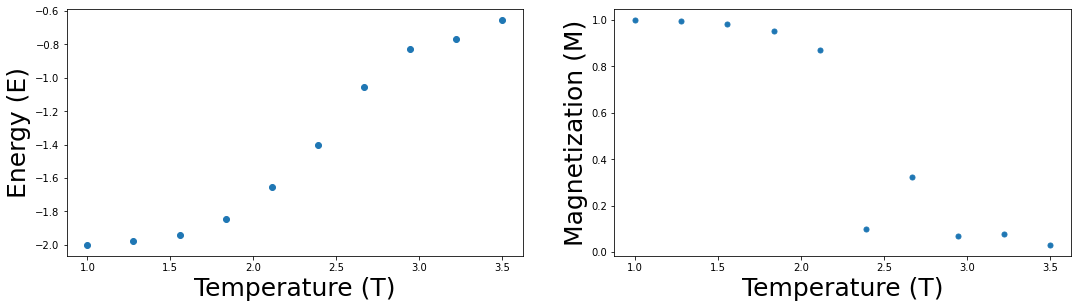

In [10]:
f = plt.figure(figsize=(18, 10))
sp =  f.add_subplot(2, 2, 1 );
plt.scatter(T, E)
plt.xlabel("Temperature (T)", fontsize=25)
plt.ylabel("Energy (E)", fontsize=25);         
plt.axis('tight');


sp =  f.add_subplot(2, 2, 2 );
plt.scatter(T, abs(M), s=25)
plt.xlabel("Temperature (T)", fontsize=25); 
plt.ylabel("Magnetization (M)", fontsize=25) 
plt.axis('tight')

plt.savefig('eng_mag.png')
plt.show()

In [17]:
import matplotlib.gridspec as gridspec
grid_size = 10
mc_steps=1000

#Set a Temperature
temper=1.0

# Create a counter variable
count = 0

# Initialize a list to store the spin configurations at different times
spins_list = []

spins = init_state(grid_size)
for step in range(mc_steps):
    spins = perform_simulation(spins=spins,beta=1.0)
    count=count+1
    if count % 50 == 0:
        spins_list.append(spins.copy())

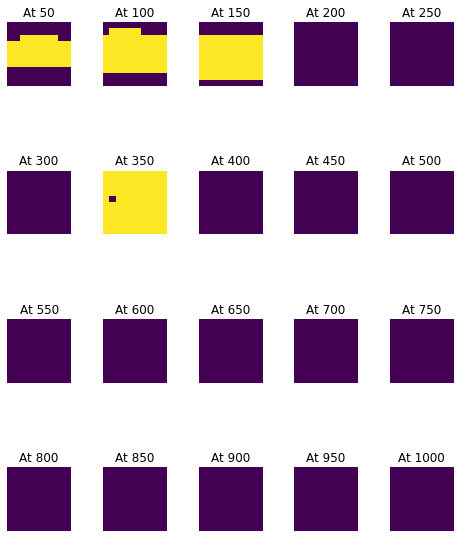

In [18]:
# Set the number of rows and columns for the grid
n_rows = 4
n_cols = 5

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(8,10))

# Flatten the axes array
axes = axes.ravel()

# Iterate over the spin configurations
for i, spins in enumerate(spins_list):
    axes[i].imshow(spins)
    axes[i].set_title(f'At {(i*50)+50}')
    # remove the axis labels and ticks
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.savefig('multi.png')
plt.show()

In [13]:
import matplotlib.gridspec as gridspec
grid_size = 64
mc_steps=1000

#Set a Temperature
temper=1.0

# Create a counter variable
count = 0

# Initialize a list to store the spin configurations at different times
spins_list = []

spins = init_state(grid_size)
for step in range(mc_steps):
    spins = perform_simulation(spins=spins,beta=1.0)
    count=count+1
    if count % 50 == 0:
        spins_list.append(spins.copy())

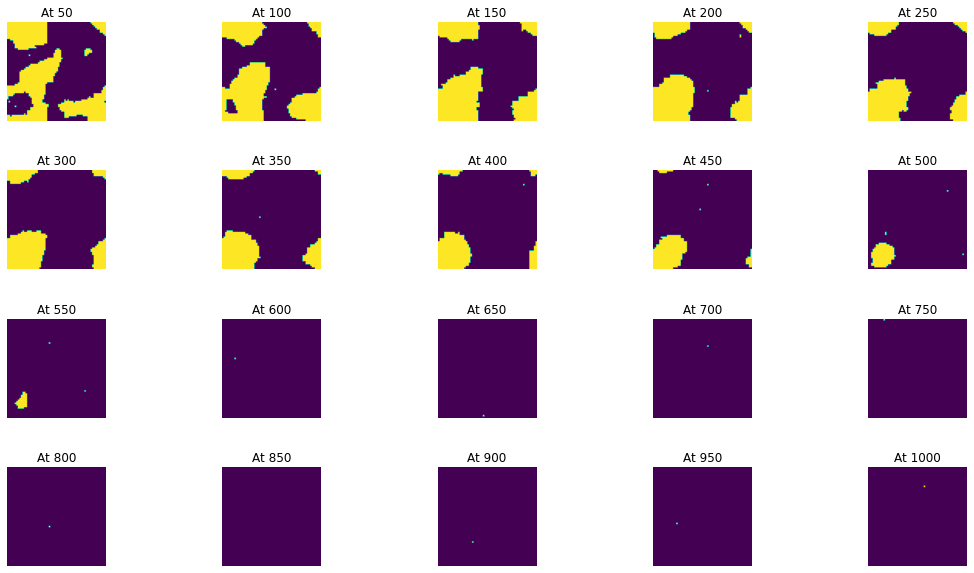

In [14]:
# Set the number of rows and columns for the grid
n_rows = 4
n_cols = 5

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18,10))

# Flatten the axes array
axes = axes.ravel()

# Iterate over the spin configurations
for i, spins in enumerate(spins_list):
    axes[i].imshow(spins)
    axes[i].set_title(f'At {(i*50)+50}')
    # remove the axis labels and ticks
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.savefig('multi_1.png')
plt.show()

In [10]:
mc_steps = 1000
#Set a Temperature
temper=1.0

# Create a counter variable
count = 0

# Initialize a list to store the spin configurations at different times
spins_list = []
eng_list = []
mag_list = []
spins = init_state(grid_size)
for step in range(mc_steps):
    spins = perform_simulation(spins=spins,beta=1.0)
    spins_list.append(spins.copy())
    eng_list.append(calcEnergy(spins,10))
    mag_list.append(calc_magnetization(spins))

Text(0.5, 0, 'MCMC Steps')

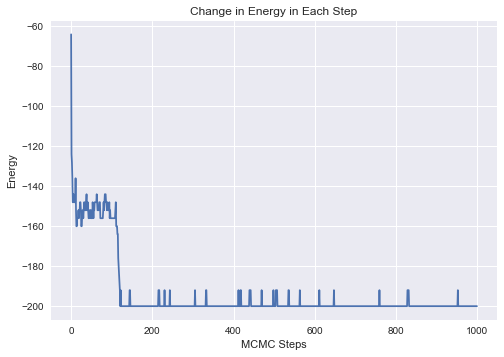

In [13]:
plt.style.use('seaborn')
plt.plot(range(mc_steps),eng_list)
plt.title('Change in Energy in Each Step')
plt.ylabel('Energy')
plt.xlabel('MCMC Steps')

Text(0.5, 0, 'MCMC Steps')

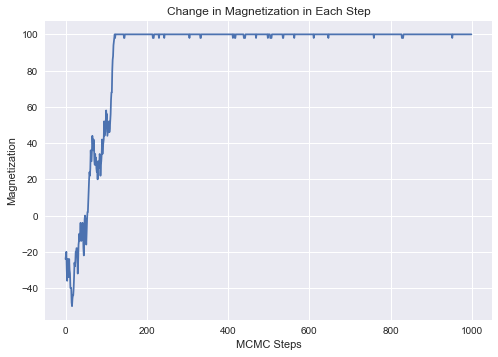

In [15]:
plt.style.use('seaborn')
plt.plot(range(mc_steps),mag_list)
plt.title('Change in Magnetization in Each Step')
plt.ylabel('Magnetization')
plt.xlabel('MCMC Steps')